- Importar librerias necesarias

In [1]:
import pandas as pd 
import seaborn as sns

# 0 Cargar datos

- Cargar datos

In [54]:
data = pd.read_csv("Data/news.csv")
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


> La base de datos puede descargarse de: https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

# 1 Explorar datos

In [55]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [56]:
data.shape

(6335, 4)

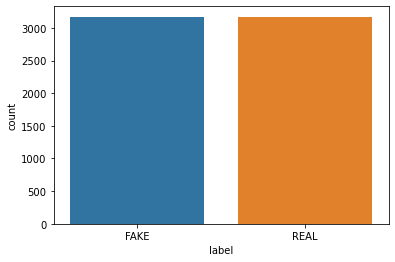

In [57]:
sns.countplot(x='label', data=data);

In [58]:
def count_words(x):
    "Devuelve el numero de palabras dentro de un string"
    return len(x.split())

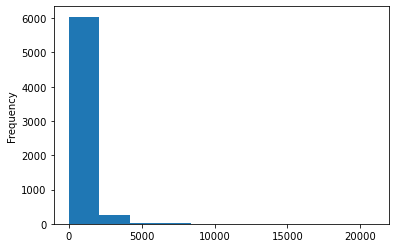

In [161]:
# Distribución de palabras
P1 = data["text"]
P1.apply(lambda x: count_words(x)).plot(kind="hist");

# 2 Preparar datos

- Dividir datos en train_test

In [162]:
X = data["text"]
Y = data.label

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

- TF IDF

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF=TfidfVectorizer(stop_words = "english", max_df=0.7, lowercase=True)       

#Aplicar TF al conjunto y obtener cada columna con el nombre de la palabra a la que refiere 
TF_train=TF.fit_transform(X_train) 
TF_train = pd.DataFrame(TF_train.toarray(), columns = TF.get_feature_names())

#Aplicar el mismo filtro al conjunto test 
TF_test=TF.transform(X_test)
TF_test = pd.DataFrame(TF_test.toarray(), columns = TF.get_feature_names())

# 4 Modelo Machine Learning

In [164]:
from sklearn.ensemble import RandomForestClassifier
#.......................................................................
model = RandomForestClassifier(n_estimators=100) 
model.fit(TF_train, Y_train)
Y_pred_title = model.predict(TF_test)


from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,Y_pred_title)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 90.37%


- El modelo es capaz de predecir con un 90 % si una noticia es falsa

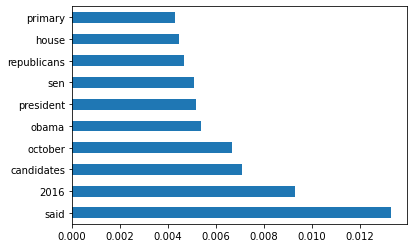

In [165]:
#Importancia de cada variable 
feat_importances = pd.Series(model.feature_importances_, index=TF_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

# 5 Guardar Modelo 

- Guardar Tokenizador

In [166]:
import joblib
joblib.dump(TF, "TFIDF")

['TFIDF']

In [167]:
TF.transform(["I have a car"])

<1x61713 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [169]:
loaded_TFIDF = joblib.load("TFIDF")

In [170]:
loaded_TFIDF.transform(["I have a car"])

<1x61713 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

- Guardar Modelo Random Forest

In [171]:
import joblib
joblib.dump(model, "model_RF")

['model_RF']

In [172]:
model.classes_

array(['FAKE', 'REAL'], dtype=object)

In [173]:
loaded_model = joblib.load("model_RF")
loaded_model.classes_

array(['FAKE', 'REAL'], dtype=object)

### Función para cargar modelo y utilizarlo con nuevos datos

In [220]:
import joblib
def predict_text (text):
    vect = joblib.load("TFIDF")
    model = joblib.load("model_RF")
    
    matrix = vect.transform([text])
    clase = model.classes_[0]
    prob = model.predict_proba(matrix)[0][0]
    print(clase, prob*100,"%" )
    return prob


In [221]:
predict_text("Aliens are coming")

FAKE 100.0 %


1.0

In [222]:
predict_text("President meeting")

FAKE 62.0 %


0.62